O Airbnb é uma empresa mundialmente conhecida pela inovação no quesito de locação rápida e prática de casas, espaços durante as viagens. Porém, toda a etapa de cadastro do imóvel ou avaliação do imóvel por usuários é feito de forma livre e por isso, alguns dados podom vir a faltar ou estarem mal formatados. Dito isto, você utilizando o dataset [New York City Airbnb Open Data](https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data) para aplicar os conceitos de data cleaning dentro do dataset proposto.
- 1 - Quantas colunas apresentam ao menos um único valor nulo?
- 2 - Se existir uma coluna do tipo Date com formatação errada, arrume essa coluna.
- 3 - Verifique a porcetagem de dados nulos por coluna. Para as colunas com menos de 1%, exclua estes registros onde tem valor nulo.
- 4 - Perceba que existem valores ausentes em casos de imóveis que nao receberam nenhum review. Neste caso, as colunas last_review e reviews_per_month vieram nulos. Preencha somente a coluna reviews_per_month com 0 (Pois não tem reviews por mês).
- 5 - Uma das etapas de cleaning é encontrar os outliers. Uma forma de fazer isso é através do Boxplot. Crie um boxplot e veza os Outliers do preço geral e outro outlier agrupando por room_type.
- 6 - Os dois gráficos acima mostram uma péssima visualização dos fatos, isto é, tem muitos outliers. Vamos reproduzir as análises acima após aplicar 2 ténicas diferentes para remoção dos outliers. Crie um DataFrame novo e aplique a técnica de IQR - [Interquartile Range](https://builtin.com/data-science/how-to-find-outliers-with-iqr) sobre a variável price. Reproduza os gráficos do exercício anterior.
- 7 - Infelizmente, mesmo após aplicar o IQR os dados ainda apresentam alguns outliers. Vamo aplicar uma segundo técnica, em cima do dataset ajustado. Aplicando o conceito de percentil, filtre novamente o dataset para selecionar os dados que estejam dentre os 95%. Reproduza os gráficos.
- 8 - Se olharmos esse novo dataset, quantos registros tem o mesmo nome (nome do imóvel registrado).
- 9 - Vamos supor que estes dados com o nome duplicado sejam dados erradas ou não atualizados. Filtre (exclua essas linhas) com o name repetido, mantendo apenas 1 dado com o last_review mais recente.
- 10 - Observe a figura abaixo, utilizando os dados fornecidos. Crie um gráfico que represente os imóveis em cada grupo e que a configuração fique semelhante a imagem abaixo. Dica: relacionar variáveis geográficas e o agrupamentos de bairro. Para isso, utilize o dataset resultante da questão anterior.
![img](https://www.vidadeturista.com/wp-content/uploads/2020/01/mapa-de-nova-york-5.gif)

Caso se interesse por um dataset mais novo ou analisar outra localidade, utilize o [Airbnb Open Data](http://insideairbnb.com/get-the-data/).


## Importação dos dados

In [ ]:
#-- Importação de bibliotecas e dados

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dnc/Dataset/AB_NYC_2019.csv')

## 1 - Quantas colunas apresentam ao menos um único valor nulo?

In [ ]:
#Resposta: 4 colunas
df.isnull().sum().sort_values()

id                                    0
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
calculated_host_listings_count        0
availability_365                      0
name                                 16
host_name                            21
last_review                       10052
reviews_per_month                 10052
dtype: int64

## 2 - Se existir uma coluna do tipo Date com formatação errada, arrume essa coluna.

In [ ]:
df['last_review'] = pd.to_datetime(df['last_review'])

In [ ]:
df.dtypes

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
dtype: object

## 3 - Verifique a porcetagem de dados nulos por coluna. Para as colunas com menos de 1%, exclua estes registros onde tem valor nulo.  

In [ ]:
df.isnull().sum()/df.shape[0]*100

id                                 0.000000
name                               0.032723
host_id                            0.000000
host_name                          0.042949
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.558339
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

In [ ]:
df.dropna(subset=['name','host_name'],axis=0,inplace=True)

df.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10037
reviews_per_month                 10037
calculated_host_listings_count        0
availability_365                      0
dtype: int64

## 4 - Perceba que existem valores ausentes em casos de imóveis que nao receberam nenhum review. Neste caso, as colunas last_review e reviews_per_month vieram nulos. Preencha somente a coluna reviews_per_month com 0 (Pois não tem reviews por mês).

In [ ]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

df.isnull().sum()


id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10037
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

## 5 - Uma das etapas de cleaning é encontrar os outliers. Uma forma de fazer isso é através do Boxplot. Crie um boxplot e veza os Outliers do preço geral e outro outlier agrupando por room_type.

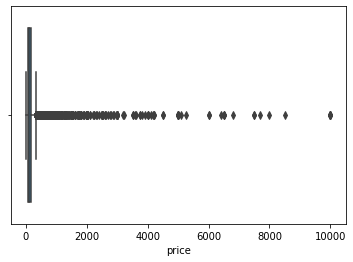

In [ ]:
sns.boxplot(data=df,x = 'price')

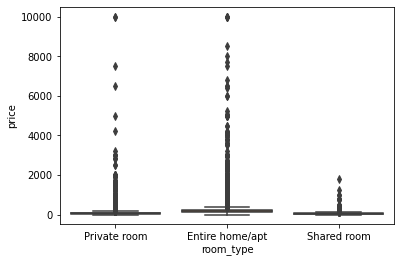

In [ ]:
sns.boxplot(data=df,x = 'room_type', y = 'price')

## 6 - Os dois gráficos acima mostram uma péssima visualização dos fatos, isto é, tem muitos outliers. Vamos reproduzir as análises acima após aplicar 2 ténicas diferentes para remoção dos outliers. Crie um DataFrame novo e aplique a técnica de IQR - [Interquartile Range](https://builtin.com/data-science/how-to-find-outliers-with-iqr) sobre a variável price. Reproduza os gráficos do exercício anterior.

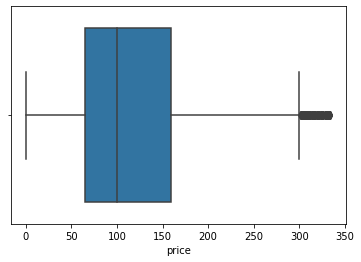

In [ ]:
price = df['price']

Q1 = price.quantile(0.25)
Q3 = price.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

df_iqr = df[(lower_bound <= df.price) & (df.price <= upper_bound)]
sns.boxplot(data=df_iqr,x = 'price')

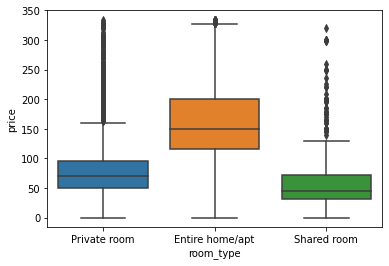

In [ ]:
sns.boxplot(data=df_iqr,x = 'room_type', y = 'price')

## 7 - Infelizmente, mesmo após aplicar o IQR os dados ainda apresentam alguns outliers. Vamo aplicar uma segundo técnica, em cima do dataset ajustado. Aplicando o conceito de percentil, filtre novamente o dataset para selecionar os dados que estejam dentre os 95%. Reproduza os gráficos.

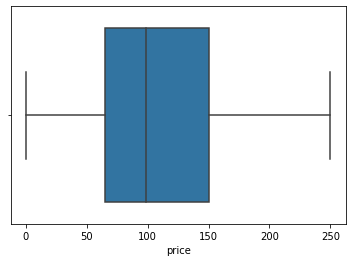

In [ ]:
df_99 = df_iqr[df_iqr.price <= df_iqr.price.quantile(0.95)]
sns.boxplot(data=df_99,x = 'price')

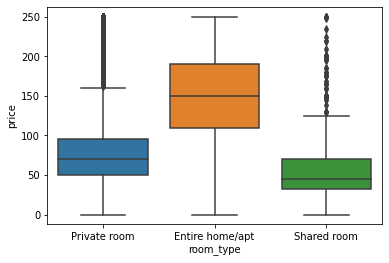

In [ ]:
sns.boxplot(data=df_99,x = 'room_type', y = 'price')

## 8 - Se olharmos esse novo dataset, quantos registres tem o mesmo nome (nome do imóvel registrado).

In [ ]:
sum(df_99.name.value_counts() > 1)

587

## 9 - Vamos supor que estes dados com o nome duplicado sejam dados erradas ou não atualizados. Filtre (exclua essas linhas) com o name repetido, mantendo apenas 1 dado com o last_review mais recente.

In [ ]:
df_filtered = df_99.sort_values(by='last_review',ascending=False).reset_index(drop=True).drop_duplicates(subset='name')
df_filtered


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,36455809,"Cozy Private Room in Bushwick, Brooklyn",74162901,Christine,Brooklyn,Bushwick,40.69805,-73.92801,Private room,30,1,1,2019-07-08,1.00,1,1
1,22340384,Great Place! Great Space! Welcome 2 My BK Place!,18049970,Lou,Brooklyn,Brownsville,40.65948,-73.90084,Entire home/apt,175,3,56,2019-07-08,3.00,2,288
2,23858270,Renovated Studio Apt! Walk to the Subway & Ferry!,18768995,MJ & Al,Brooklyn,Bay Ridge,40.62989,-74.02345,Private room,90,3,34,2019-07-08,2.24,1,231
3,35945823,PLUSH RENOVATED APARTMENT CLOSE TO MANHATTAN!,269818817,Mark,Queens,Ridgewood,40.70320,-73.89571,Entire home/apt,220,4,2,2019-07-08,2.00,2,146
4,24391756,Sunny Apartment in Park Slope,20813915,Kimberly,Brooklyn,South Slope,40.66409,-73.99090,Entire home/apt,145,1,90,2019-07-08,5.97,1,212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43648,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaT,0.00,2,9
43649,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaT,0.00,2,36
43650,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaT,0.00,1,27
43651,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaT,0.00,6,2


## 10 - Observe a figura abaixo, utilizando os dados fornecidos. Crie um gráfico que represente os imóveis em cada grupo e que a configuração fique semelhante a imagem abaixo. Dica: relacionar variáveis geográficas e o agrupamentos de bairro. Para isso, utilize o dataset resultante da questão anterior.
![img](https://www.vidadeturista.com/wp-content/uploads/2020/01/mapa-de-nova-york-5.gif)

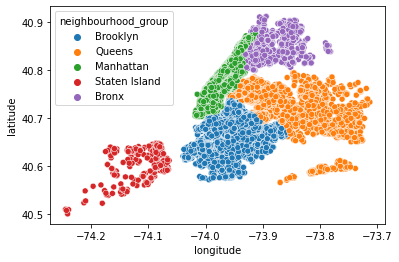

In [ ]:
sns.scatterplot(data=df_filtered,x='longitude',y='latitude',hue='neighbourhood_group')